# 1. Import Library

In [197]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


#Import Library 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Import Dataset

In [231]:
#Import Dataset
df = pd.read_csv('./data/Phishing_Email.csv')

# 3. Understanding Dataset

In [7]:
#Menampilkan 5 data teratas
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [8]:
#Menampilkan 5 data terbawah
df.tail()

,Unnamed: 0,Email Text,Email Type
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email
18649,18650,empty,Phishing Email


In [13]:
#Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [18]:
#Menampilkan statistik deskriptif dataset
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [106]:
#Menampilkan panjang karakter email
df['Email Text'] = df['Email Text'].astype(str)
df['length'] = df['Email Text'].apply(len)
df.head()

,Unnamed: 0,Email Text,Email Type,length
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441


# 4. Exploration Data Analysis (EDA)

### Data Cleaning

In [107]:
#Data Cleaning = Menghapus kolom yang tidak diperlukan
df_cleaned = df.drop(columns=['Unnamed: 0'])

In [108]:
#Mengecek data yang kosong pada dataset
missing_values = df_cleaned.isnull().sum()

#Menghapus data yang kosong pada kolom Email Text
df_cleaned = df_cleaned.dropna(subset=['Email Text'])

In [109]:
#Melakukan cross check data yang kosong pada dataset
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Email Text    0
Email Type    0
length        0
dtype: int64


### Descriptive Statistics

In [111]:
#Menampilkan statistik deskriptif dataset
df_cleaned['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [112]:
#Menampilkan panjang karakter email
df['Email Text'] = df_cleaned['Email Text'].astype(str)
df['length'] = df_cleaned['Email Text'].apply(len)
df_cleaned.head()

,Email Text,Email Type,length
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030
1,the other side of * galicismos * * galicismo *...,Safe Email,479
2,re : equistar deal tickets are you still avail...,Safe Email,1245
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688
4,software at incredibly low prices ( 86 % lower...,Phishing Email,441


### Visualization

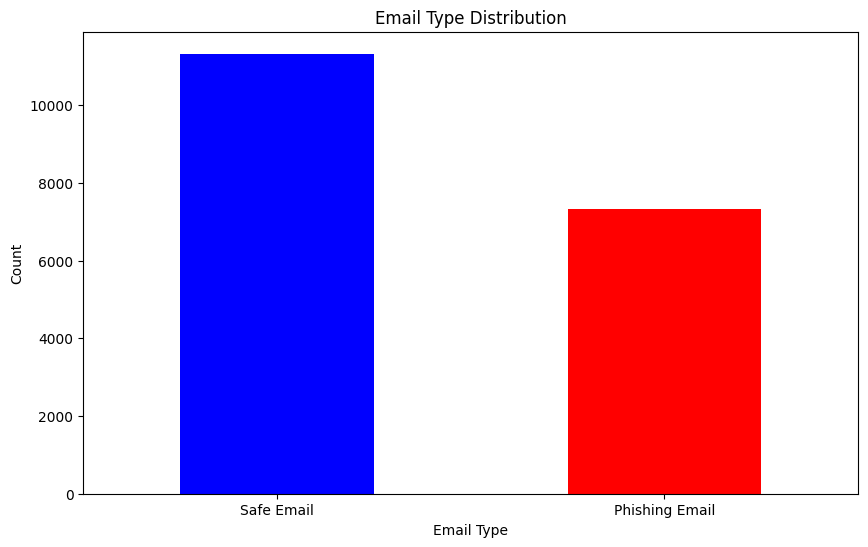

In [113]:
# Membuat variable email_type_distribution yang berisi jumlah email berdasarkan Email Type
email_type_distribution = df_cleaned['Email Type'].value_counts()

# Membuat plot jumlah email berdasarkan Email Type
plt.figure(figsize=(10, 6))
email_type_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Email Type Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Length of Text')

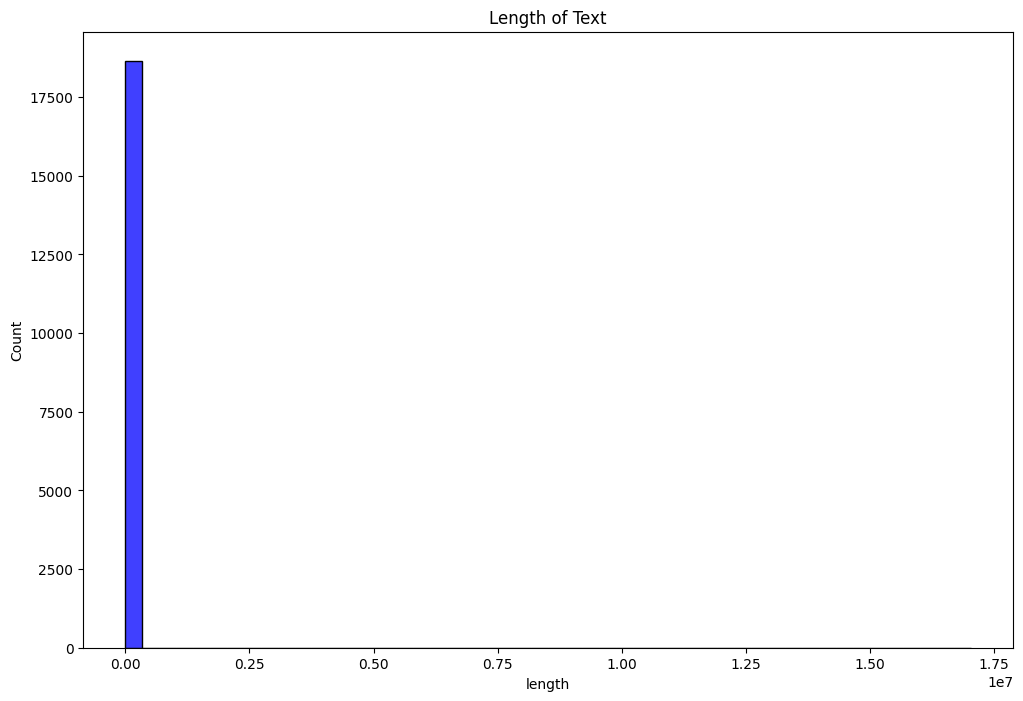

In [114]:
# Membuat plot panjang karakter email
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df_cleaned,bins=50, color='blue')
plt.title('Length of Text')

array([<Axes: title={'center': 'Phishing Email'}>,
       <Axes: title={'center': 'Safe Email'}>], dtype=object)

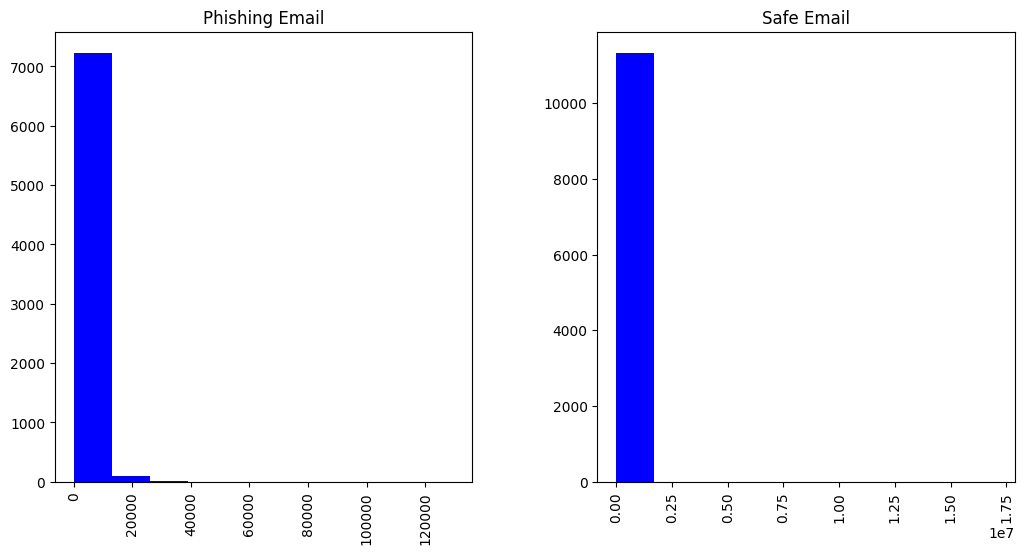

In [115]:
# Membuat plot panjang karakter email berdasarkan Email Type
df_cleaned.hist(column='length',by='Email Type', figsize=(12,6) , color='blue')

# 5. Preprocessing Data

### Preprocessing Function

In [116]:
# Mengaplikasikan fungsi preprocessing
df_cleaned['Email Text'] = df_cleaned['Email Text'].astype(str)

# Menghapus karakter khusus
df_cleaned = df_cleaned[df_cleaned['Email Text'].apply(lambda x: isinstance(x, str))]

### Tokenization

In [117]:
# Melakukan tokenisasi pada email text
df_cleaned['Tokenized Text'] = df_cleaned['Email Text'].apply(word_tokenize)

# Print the tokenized texts
print(df_cleaned['Tokenized Text'])

0        [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1        [the, other, side, of, *, galicismos, *, *, ga...
2        [re, :, equistar, deal, tickets, are, you, sti...
3        [Hello, I, am, your, hot, lil, horny, toy, ., ...
4        [software, at, incredibly, low, prices, (, 86,...
                               ...                        
18645    [date, a, lonely, housewife, always, wanted, t...
18646    [request, submitted, :, access, request, for, ...
18647    [re, :, important, -, prc, mtg, hi, dorn, &, j...
18648    [press, clippings, -, letter, on, californian,...
18649                                              [empty]
Name: Tokenized Text, Length: 18650, dtype: object


### Stopwords Removal


In [118]:
# Menghapus stopwords dari tokenized text
df_cleaned['Tokenized Text'] = df_cleaned['Tokenized Text'].apply(lambda x: [word for word in x if word.lower() not in stopwords.words('english')])

# Melakukan print tokenized text
print(df_cleaned['Tokenized Text'])

0        [:, 6, ., 1100, ,, disc, :, uniformitarianism,...
1        [side, *, galicismos, *, *, galicismo, *, span...
2        [:, equistar, deal, tickets, still, available,...
3        [Hello, hot, lil, horny, toy, ., one, dream, ,...
4        [software, incredibly, low, prices, (, 86, %, ...
                               ...                        
18645    [date, lonely, housewife, always, wanted, date...
18646    [request, submitted, :, access, request, anita...
18647    [:, important, -, prc, mtg, hi, dorn, &, john,...
18648    [press, clippings, -, letter, californian, uti...
18649                                              [empty]
Name: Tokenized Text, Length: 18650, dtype: object


### Stemming

In [129]:
# Menginisialisasi PorterStemmer
stemmer = PorterStemmer()

# Melakukan stemming pada Tokenized Text column di df_cleaned
df_cleaned['Tokenized Text'] = df_cleaned['Tokenized Text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Melakukan print dari Tokenized Text column
print(df_cleaned['Tokenized Text'])

0        [:, 6, ., 1100, ,, disc, :, uniformitarian, ,,...
1        [side, *, galicismo, *, *, galicismo, *, spani...
2        [:, equistar, deal, ticket, still, avail, assi...
3        [hello, hot, lil, horni, toy, ., one, dream, ,...
4        [softwar, incr, low, price, (, 86, %, lower, )...
                               ...                        
18645    [date, lone, housewif, alway, want, date, lone...
18646    [request, submit, :, access, request, anita, ....
18647    [:, import, -, prc, mtg, hi, dorn, &, john, ,,...
18648    [press, clip, -, letter, californian, util, pl...
18649                                              [empti]
Name: Tokenized Text, Length: 18650, dtype: object


In [135]:
# Menggabungkan semua hasil preprocessing
df_cleaned['Processed Text'] = df_cleaned['Tokenized Text'].apply(lambda x: ' '.join(x))

### Transformation


In [141]:
# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transform pada tfidf_matrix
tfidf_matrix = vectorizer.fit_transform(df_cleaned['Processed Text'])

# Mencetak ukuran tfidf_matrix
print(tfidf_matrix.shape)

(18650, 140387)


# 6. Data Mining (Support Vector Machine)

### Imbalance Handling using Undersampling

In [142]:
# Menggunakan undersampling untuk mengatasi dataset yang tidak seimbang
df_phishing = df_cleaned[df_cleaned['Email Type'] == 'Safe Email']
df_non_phishing = df_cleaned[df_cleaned['Email Type'] == 'Phishing Email']

# Melakukan undersampling pada dataset
df_phishing = df_phishing.sample(df_non_phishing.shape[0])

In [143]:
# Mengecek kembali shape dari dataset
print(df_phishing.shape)
print(df_non_phishing.shape)

(7328, 5)
(7328, 5)


In [149]:
# Membuat dataset baru dari hasil undersampling yang telah dilakukan
df_balanced = pd.concat([df_phishing, df_non_phishing], ignore_index=True)
df_balanced.head()

,Email Text,Email Type,length,Tokenized Text,Processed Text
0,URL: http://jeremy.zawodny.com/blog/archives/0...,Safe Email,308,"[url, :, http, :, //jeremy.zawodny.com/blog/ar...",url : http : //jeremy.zawodny.com/blog/archive...
1,URL: http://jeremy.zawodny.com/blog/archives/0...,Safe Email,313,"[url, :, http, :, //jeremy.zawodny.com/blog/ar...",url : http : //jeremy.zawodny.com/blog/archive...
2,trend analysis for select commodity groups fyi...,Safe Email,3199,"[trend, analysi, select, commod, group, fyi, -...",trend analysi select commod group fyi - final ...
3,ees organizational announcement - - - - - - - ...,Safe Email,1863,"[ee, organiz, announc, -, -, -, -, -, -, -, -,...",ee organiz announc - - - - - - - - - - - - - -...
4,the latest issue ( 1994 n01 ) of etudes de let...,Safe Email,1202,"[latest, issu, (, 1994, n01, ), etud, de, lett...",latest issu ( 1994 n01 ) etud de lettr public ...


### Model Training

In [211]:
# Mendefinisikan variabel X dan y
X = df_cleaned['Processed Text']
y = df_cleaned['Email Type']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [212]:
# Transform the training and testing data using TfidfVectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [213]:
# Import model menggunakan pickle
import pickle

# Melakukan fit model pada training set
svm_model.fit(X_train_tfidf, y_train)

# Menyimpan model ke dalam file
with open('./models/trained_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# 7. Evaluasi Model

In [233]:
model_file = './models/trained_model.pkl'

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Predict the labels of the test dataset
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Support Vector Machine (SVM) Performance:')
print(f'Accuracy: {accuracy:.4f}')

Support Vector Machine (SVM) Performance:
Accuracy: 0.9755


In [215]:
# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      2428
    Safe Email       0.99      0.97      0.98      3727

      accuracy                           0.98      6155
     macro avg       0.97      0.98      0.97      6155
  weighted avg       0.98      0.98      0.98      6155

Confusion Matrix:
[[2383   45]
 [ 106 3621]]


### Visualiasi Confussion Matrix, Classification Report, dan Akurasi

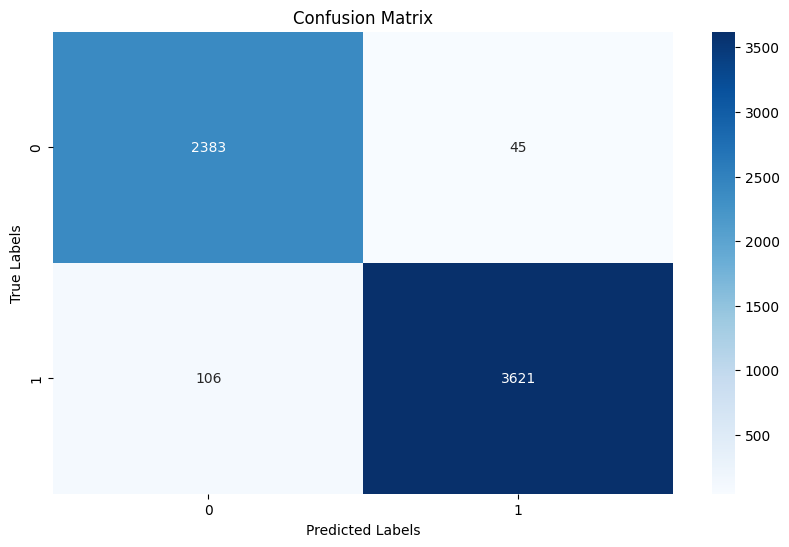

In [216]:
# Membuat plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

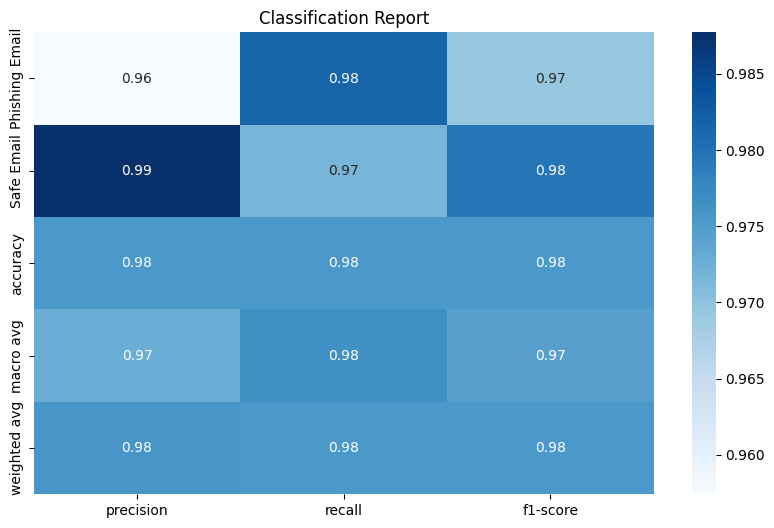

In [217]:
# Membuat plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

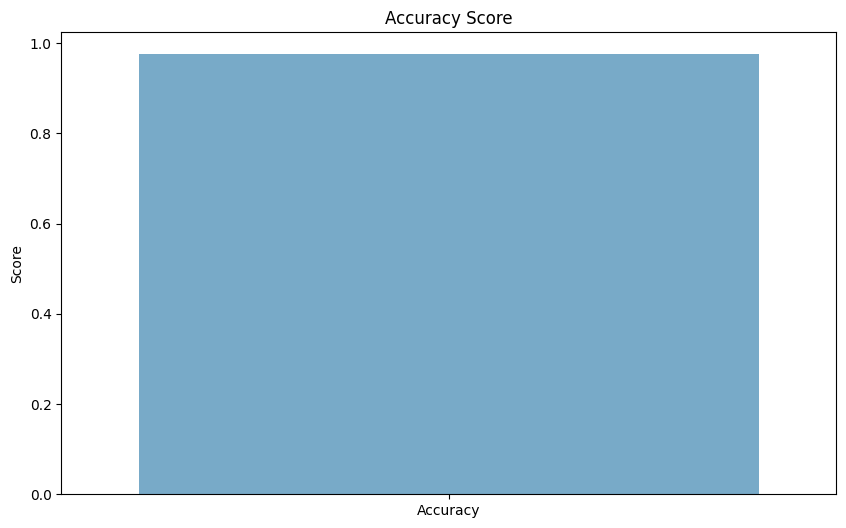

In [218]:
# Membuat plot accuracy score
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues', hue=['Accuracy'])
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.show()

# 8. Prediksi

In [230]:
# Fungsi prediksi email
def predict_email(email_text):
    # Load the model
    with open(model_file, 'rb') as file:
        model = pickle.load(file)
    
    # Transform the email text
    email_text_tfidf = vectorizer.transform([email_text])
    
    # Predict the email type
    prediction = model.predict(email_text_tfidf)
    
    return prediction[0]

# Prediksi email
email_text = """
Subject: Project Deadline Extended

Hi Team,

Due to unforeseen circumstances, the project deadline has been extended by one week. Please adjust your schedules accordingly and continue to work diligently.

Best regards,
John Smith
Project Lead


"""
prediction = predict_email(email_text)
print(f'The email is a {prediction}.')

The email is a Safe Email.
